# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.6.0-delta.new.72.fix.120.155.157'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
168780,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168781,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168782,2020-07-31,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168783,2020-08-01,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168784,2020-08-02,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
168780,2020-07-29,Colombia,Vichada,2,1,0,1
168781,2020-07-30,Colombia,Vichada,2,1,0,1
168782,2020-07-31,Colombia,Vichada,2,1,0,1
168783,2020-08-01,Colombia,Vichada,2,1,0,1
168784,2020-08-02,Colombia,Vichada,2,1,0,1


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
196,2020-07-29,11861,2774,329,8758
197,2020-07-30,12228,2789,330,9109
198,2020-07-31,12691,2921,332,9438
199,2020-08-01,13163,3216,332,9615
200,2020-08-02,13455,3508,332,9615


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-07-29,17019871,6467889,668343,9883639,0.019634,0.290356,0.063338
2020-07-30,17327289,6583253,674311,10069725,0.019458,0.290574,0.062761
2020-07-31,17578904,6640181,680456,10258267,0.019354,0.291778,0.062206
2020-08-01,17849543,6687394,685538,10476611,0.019203,0.293470,0.061416
2020-08-02,17850873,6688248,685538,10477087,0.019202,0.293461,0.061414


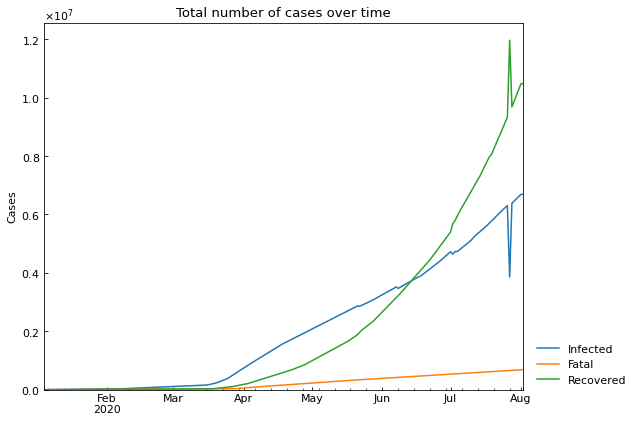

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
207,2020-07-29,33448,8942,1005,23501
208,2020-07-30,34749,9569,1006,24174
209,2020-07-31,36330,10395,1012,24923
210,2020-08-01,37866,11357,1012,25497
211,2020-08-02,39191,12279,1012,25900


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
167,2020-07-27,29969,6857,996,22116
168,2020-07-28,30961,7152,998,22811
169,2020-07-29,31901,7393,1001,23507
170,2020-07-30,33049,7866,1004,24179
171,2020-07-31,34372,8437,1006,24929


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
168780,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168781,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168782,2020-07-31,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168783,2020-08-01,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168784,2020-08-02,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
165564,COL,Colombia,Vichada,2020-07-29,107808
165565,COL,Colombia,Vichada,2020-07-30,107808
165566,COL,Colombia,Vichada,2020-07-31,107808
165567,COL,Colombia,Vichada,2020-08-01,107808
165568,COL,Colombia,Vichada,2020-08-02,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
168780,2020-07-29,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168781,2020-07-30,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168782,2020-07-31,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168783,2020-08-01,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
168784,2020-08-02,2,1,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
168780,2020-07-29,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
168781,2020-07-30,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
168782,2020-07-31,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
168783,2020-08-01,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
168784,2020-08-02,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset(country="Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
207,2020-07-29,1,1,1,0,0,1,1,3,2,2,1,32.41
208,2020-07-30,1,1,1,0,0,1,1,3,2,2,1,32.41
209,2020-07-31,1,1,1,0,0,1,1,3,2,2,1,32.41
210,2020-08-01,1,1,1,0,0,1,1,3,2,2,1,32.41
211,2020-08-02,1,1,1,0,0,1,1,3,2,2,1,32.41


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset(iso3="JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
207,2020-07-29,1,1,1,0,0,1,1,3,2,2,1,32.41
208,2020-07-30,1,1,1,0,0,1,1,3,2,2,1,32.41
209,2020-07-31,1,1,1,0,0,1,1,3,2,2,1,32.41
210,2020-08-01,1,1,1,0,0,1,1,3,2,2,1,32.41
211,2020-08-02,1,1,1,0,0,1,1,3,2,2,1,32.41


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

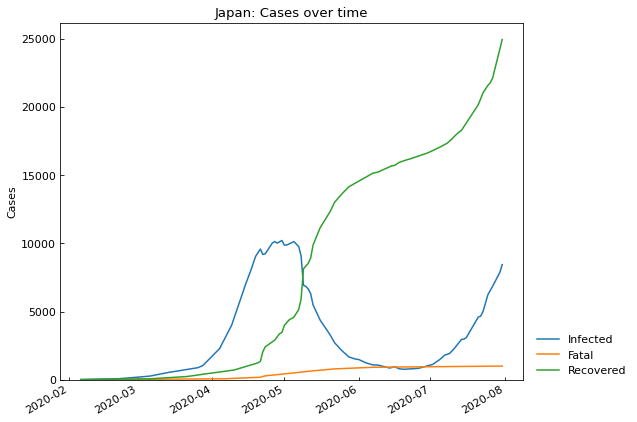

,Date,Confirmed,Infected,Fatal,Recovered
167,2020-07-27,29969,6857,996,22116
168,2020-07-28,30961,7152,998,22811
169,2020-07-29,31901,7393,1001,23507
170,2020-07-30,33049,7866,1004,24179
171,2020-07-31,34372,8437,1006,24929


In [26]:
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

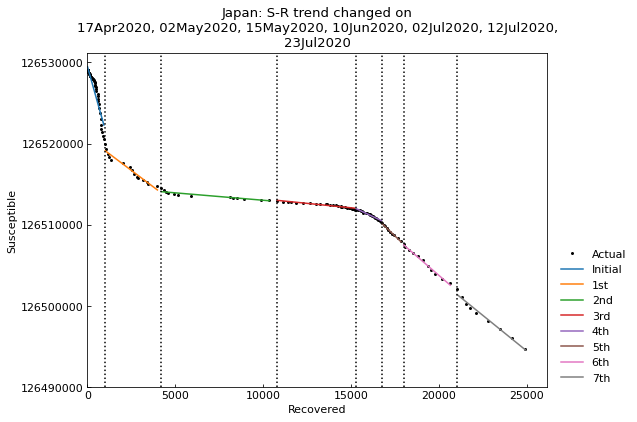

,Type,Start,End,Population
1st,Past,17Apr2020,01May2020,126529100
2nd,Past,02May2020,14May2020,126529100
3rd,Past,15May2020,09Jun2020,126529100
4th,Past,10Jun2020,01Jul2020,126529100
5th,Past,02Jul2020,11Jul2020,126529100
6th,Past,12Jul2020,22Jul2020,126529100
7th,Past,23Jul2020,31Jul2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<Main scenario: perform parameter estimation>

Running optimization with 4 CPUs...

	7th phase with SIR-F model finished 513 trials in 0 min 15 sec.

	1st phase with SIR-F model finished 164 trials in 0 min 5 sec.

	2nd phase with SIR-F model finished 162 trials in 0 min 5 sec.

	4th phase with SIR-F model finished 156 trials in 0 min 5 sec.

	5th phase with SIR-F model finished 195 trials in 0 min 5 sec.

	6th phase with SIR-F model finished 190 trials in 0 min 5 sec.

	3rd phase with SIR-F model finished 355 trials in 0 min 10 sec.

Completed optimization. Total: 0 min 26 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,rho,sigma,theta,kappa,tau,Rt,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
1st,Past,17Apr2020,01May2020,126529100,SIR-F,0.010953,0.004857,0.047160,0.000079,360,2.11,0.047,3148,22,51,0.137476,164,0 min 5 sec
2nd,Past,02May2020,14May2020,126529100,SIR-F,0.003969,0.014883,0.056732,0.000540,360,0.24,0.057,462,62,16,0.159309,162,0 min 5 sec
3rd,Past,15May2020,09Jun2020,126529100,SIR-F,0.004105,0.020125,0.189291,0.000070,360,0.16,0.189,3586,60,12,0.108743,355,0 min 10 sec
4th,Past,10Jun2020,01Jul2020,126529100,SIR-F,0.017482,0.017795,0.115711,0.000150,360,0.86,0.116,1667,14,14,0.143076,156,0 min 5 sec
5th,Past,02Jul2020,11Jul2020,126529100,SIR-F,0.038414,0.016679,0.050413,0.000555,360,2.12,0.050,450,6,14,0.059369,195,0 min 5 sec
6th,Past,12Jul2020,22Jul2020,126529100,SIR-F,0.032723,0.018251,0.001114,0.000071,360,1.78,0.001,3514,7,13,0.039045,190,0 min 5 sec
7th,Past,23Jul2020,31Jul2020,126529100,SIR-F,0.033329,0.015231,0.000824,0.000859,360,2.07,0.001,291,7,16,0.066827,513,0 min 15 sec


### Accuracy of estimation

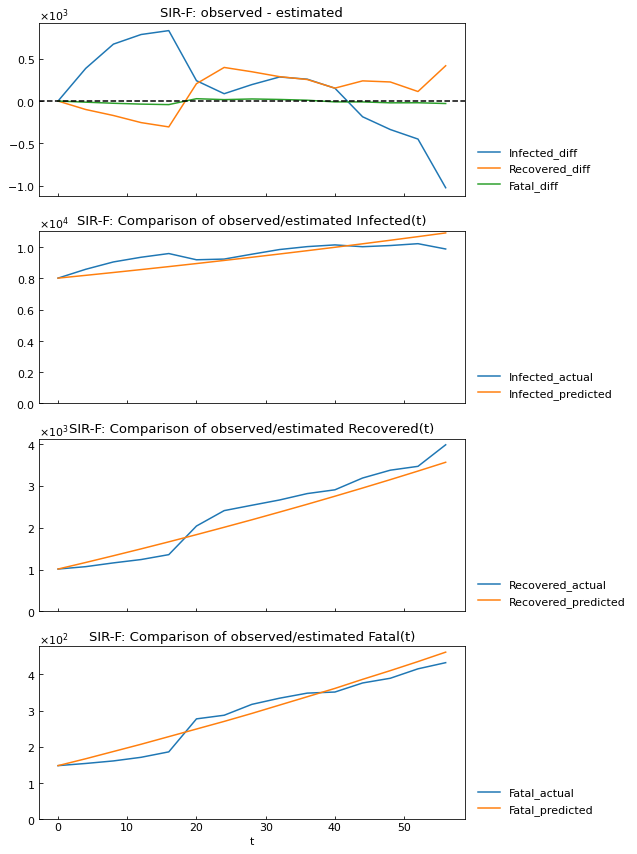

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

0.86

### Show parameter history

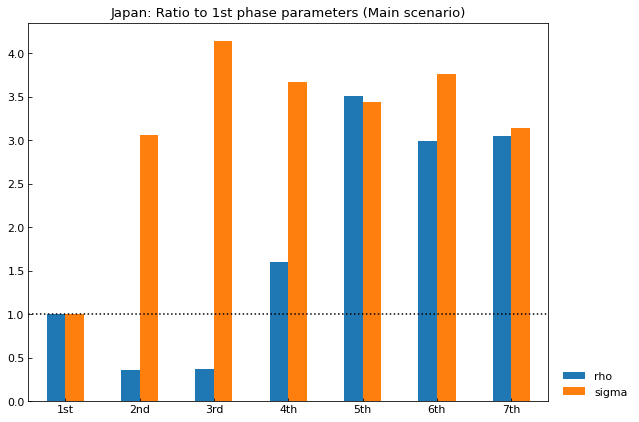

,1st,2nd,3rd,4th,5th,6th,7th
rho,1.0,0.362318,0.374781,1.596116,3.507112,2.98751,3.042891
sigma,1.0,3.064062,4.143285,3.663510,3.433837,3.75737,3.135634


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

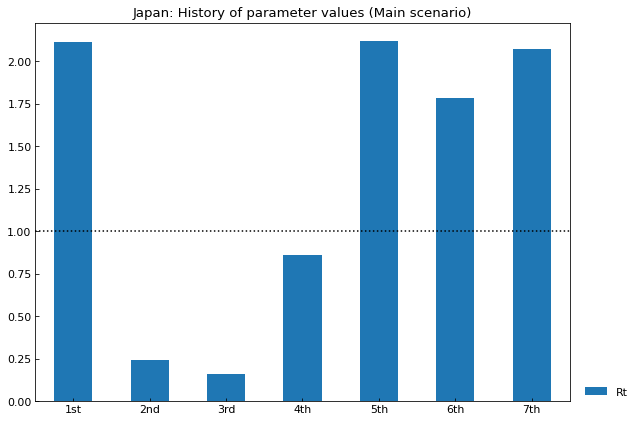

,1st,2nd,3rd,4th,5th,6th,7th
Rt,2.11,0.24,0.16,0.86,2.12,1.78,2.07


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

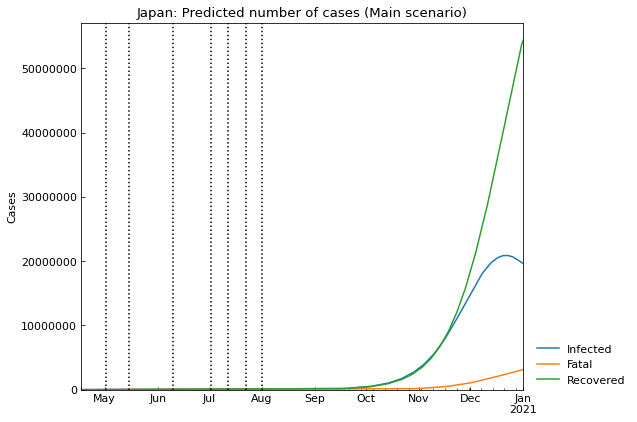

,Date,Fatal,Infected,Recovered,Susceptible
255,28Dec2020,2877313,20352314,49961871,53337602
256,29Dec2020,2947847,20174007,51196472,52210774
257,30Dec2020,3017702,19973879,52419547,51117971
258,31Dec2020,3086808,19753331,53629809,50059152
259,01Jan2021,3129621,19606473,54379750,49413257


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.01523085028398187

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.03046170056796374

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE       rho  \
Scenario Phase                                                              
Main     0th      Past  17Apr2020  01May2020   126529100  SIR-F  0.010953   
         1st      Past  02May2020  14May2020   126529100  SIR-F  0.003969   
         2nd      Past  15May2020  09Jun2020   126529100  SIR-F  0.004105   
         3rd      Past  10Jun2020  01Jul2020   126529100  SIR-F  0.017482   
         4th      Past  02Jul2020  11Jul2020   126529100  SIR-F  0.038414   
         5th      Past  12Jul2020  22Jul2020   126529100  SIR-F  0.032723   
         6th      Past  23Jul2020  31Jul2020   126529100  SIR-F  0.033329   
         7th    Future  01Aug2020  01Jan2021   126529100  SIR-F  0.033329   
Medicine 0th      Past  17Apr2020  01May2020   126529100  SIR-F  0.010953   
         1st      Past  02May2020  14May2020   126529100  SIR-F  0.003969   
         2nd      Past  15May2020  09Jun2020   126529100  SIR-F  0.004105   
         3rd      Past  10Jun2020  01Jul2020   126529100  SIR-F  0.017482   
         4th      Past  02Jul2020  11Jul2020   126529100  SIR-F  0.038414   
         5th      Past  12Jul2020  22Jul2020   126529100  SIR-F  0.032723   
         6th      Past  23Jul2020  31Jul2020   126529100  SIR-F  0.033329   
         7th    Future  01Aug2020  31Aug2020   126529100  SIR-F  0.033329   
         8th    Future  01Sep2020  01Jan2021   126529100  SIR-F  0.033329   

                   sigma     theta     kappa  tau    Rt  alpha1 [-]  \
Scenario Phase                                                        
Main     0th    0.004857  0.047160  0.000079  360  2.11       0.047   
         1st    0.014883  0.056732  0.000540  360  0.24       0.057   
         2nd    0.020125  0.189291  0.000070  360  0.16       0.189   
         3rd    0.017795  0.115711  0.000150  360  0.86       0.116   
         4th    0.016679  0.050413  0.000555  360  2.12       0.050   
         5th    0.018251  0.001114  0.000071  360  1.78       0.001   
         6th    0.015231  0.000824  0.000859  360  2.07       0.001   
         7th    0.015231  0.000824  0.000859  360  2.07       0.001   
Medicine 0th    0.004857  0.047160  0.000079  360  2.11       0.047   
         1st    0.014883  0.056732  0.000540  360  0.24       0.057   
         2nd    0.020125  0.189291  0.000070  360  0.16       0.189   
         3rd    0.017795  0.115711  0.000150  360  0.86       0.116   
         4th    0.016679  0.050413  0.000555  360  2.12       0.050   
         5th    0.018251  0.001114  0.000071  360  1.78       0.001   
         6th    0.015231  0.000824  0.000859  360  2.07       0.001   
         7th    0.015231  0.000824  0.000859  360  2.07       0.001   
         8th    0.030462  0.000824  0.000859  360  1.06       0.001   

                1/alpha2 [day]  1/beta [day]  1/gamma [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     0th              3148            22             51   0.137476    164   
         1st               462            62             16   0.159309    162   
         2nd              3586            60             12   0.108743    355   
         3rd              1667            14             14   0.143076    156   
         4th               450             6             14  0.0593688    195   
         5th              3514             7             13  0.0390454    190   
         6th               291             7             16  0.0668274    513   
         7th               291             7             16          -      -   
Medicine 0th              3148            22             51   0.137476    164   
         1st               462            62             16   0.159309    162   
         2nd              3586            60             12   0.108743    355   
         3rd              1667            14             14   0.143076    156   
         4th               450             6             14  0.0593688

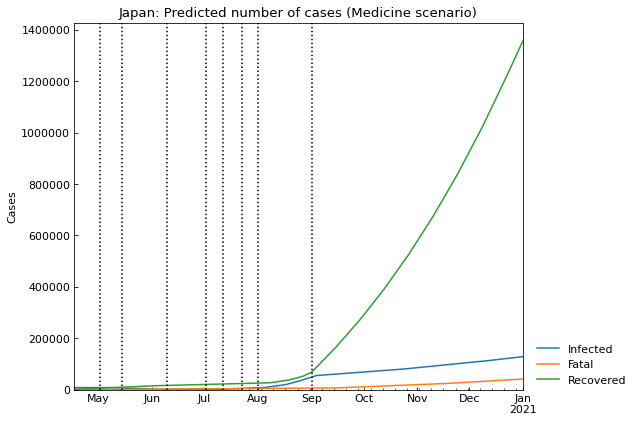

,Date,Fatal,Infected,Recovered,Susceptible
255,28Dec2020,39995,125712,1303337,125060056
256,29Dec2020,40442,126515,1318703,125043440
257,30Dec2020,40891,127322,1334168,125026719
258,31Dec2020,41344,128131,1349730,125009895
259,01Jan2021,41628,128638,1359504,124999331


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 01Jan2021,Fatal on 01Jan2021
Main,20893806,22Dec2020,19606473,3129621
Medicine,128638,01Jan2021,128638,41628
